In [225]:
from pathlib import Path
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

from sklearn.compose import ColumnTransformer

In [216]:
df = pd.read_csv("../data/output/with_factors.csv")

In [217]:
df.columns

Index(['Unnamed: 0', 'sequence_dna', 'fitness', 'p_value', 'standard_error',
       'mutated_wildtype_dna', 'mutated_dna_0', 'mutated_dna_1',
       'mutated_dna_2', 'mutated_dna_3', 'mutated_dna_4', 'mutated_dna_5',
       'mutated_dna_6', 'mutated_dna_7', 'mutated_dna_8',
       'mutated_amino_acids', 'minimum_free_energy'],
      dtype='object')

In [243]:
variables = [
    "minimum_free_energy",
    "p_value",
    "standard_error",
    "mutated_dna_0",
    "mutated_dna_1",
    "mutated_dna_2",
    "mutated_dna_3",
    "mutated_dna_4",
    "mutated_dna_5",
    "mutated_dna_6",
    "mutated_dna_7",
    "mutated_dna_8",
]
group_by = ["mutated_amino_acids"]
significant_threshold = 0.05

In [244]:
X_numerical = df[variables].select_dtypes(include="number")
X_categorical = df[variables].select_dtypes(include="object")

In [245]:
for categorical_column in X_categorical.columns:
    X_categorical[categorical_column] = LabelEncoder().fit_transform(X_categorical[categorical_column])

In [246]:
X_categorical

,mutated_dna_0,mutated_dna_1,mutated_dna_2,mutated_dna_3,mutated_dna_4,mutated_dna_5,mutated_dna_6,mutated_dna_7,mutated_dna_8
0,3,2,1,1,0,1,0,1,2
1,3,3,1,2,0,2,0,1,2
2,0,3,2,2,0,0,0,3,1
3,2,3,3,2,0,2,0,2,2
4,2,2,1,3,2,3,0,3,3
...,...,...,...,...,...,...,...,...,...
1721,0,0,3,2,0,1,0,3,2
1722,1,1,2,2,0,1,2,3,1
1723,0,0,1,2,0,0,3,0,2
1724,1,0,2,2,0,2,2,2,3


In [247]:

X = pd.concat([X_numerical, X_categorical], axis=1)  # type: ignore

In [248]:
y = df["fitness"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [249]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [250]:

permutation_result = permutation_importance(model, X_val, y_val, scoring="r2")
importance_dict = {
    "importance_mean": permutation_result["importances_mean"],
    "importance_std": permutation_result["importances_std"],
    "variable": variables
}

In [251]:
importance_df = pd.DataFrame(importance_dict)

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='importance_mean', ylabel='variable'>

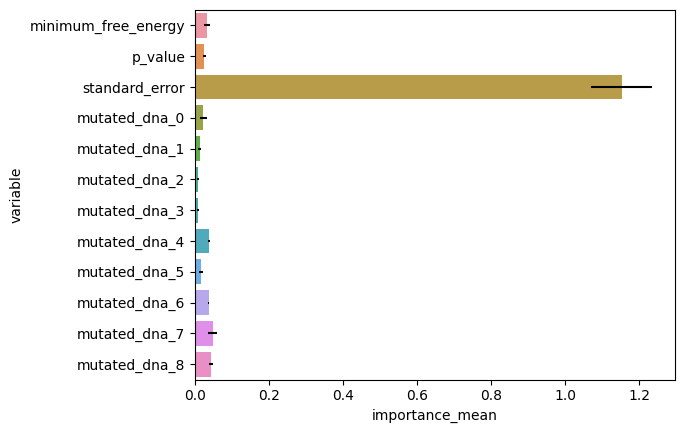

In [261]:
plt.subplots_adjust(left=0.15)
sns.barplot(data=importance_df, x="importance_mean", y="variable", xerr=importance_df["importance_std"])